In [33]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

%matplotlib inline

In [34]:
# Retrieve data
url = 'https://openstax.org/books/introductory-statistics/pages/7-5-central-limit-theorem-cookie-recipes'
df = pd.read_html(url, attrs={'data-id': 'tableones23'})[0]

xs = np.array([df.iloc[:, 1:2].values,
               df.iloc[:, 4:5].values,
               df.iloc[:, 7:8].values,
               df.iloc[:, 10:11].values])
data = pd.DataFrame(xs.flatten(), columns=['X'])

In [35]:
# Calculate the following:
print(f'a. μx = {data.mean()}')
print(f'b. σx = {data.std()}')

a. μx = X    3.566667
dtype: float64
b. σx = X    2.165732
dtype: float64


**Collect the Data**

*Use a random number generator to randomly select four samples of size n = 5 from the given population. Record your samples in Table 7.5. Then, for each sample, calculate the mean to the nearest tenth. Record them in the spaces provided. Record the sample means for the rest of the class.*

Complete the table:

In [36]:
def generate_n_samples(ns, n, population, random_state=1):
  df = pd.DataFrame()
  s = {}
  data = population.copy()
  for i in range(0, ns):
    sample = data.sample(n, random_state=random_state)
    data.drop(index=sample.index, inplace=True)
    s[f'Sample {i + 1}'] = pd.Series(sample.values.reshape(-1))
  
  df[f'Sample means from other groups:'] = pd.Series(data.values.reshape(-1))
  for k, v in s.items():
    df[k] = v

  return df.reindex(sorted(df.columns), axis=1)

In [37]:
def print_table(df):
  print('Table:\n')

  for column in df.columns:
    print(column, end='\t')
  print('')

  for i, row in df.iterrows():
    for v in row:
      print(v if pd.notna(v) else '', end='\t\t')
    print('')

  for column in df.columns:
    print(f'mean = {df[column].mean()}', end='\t')
  print('')
  
  for column in df.columns:
    print(f'S = {np.round(df[column].std(), 4)}', end='\t')

In [38]:
samples = generate_n_samples(4, 5, data)
print_table(samples)

Table:

Sample 1	Sample 2	Sample 3	Sample 4	Sample means from other groups:	
6.0		4.0		3.0		2.0		1.0		
6.0		5.0		2.0		1.0		5.0		
2.0		1.0		11.0		2.0		6.0		
5.0		6.0		2.0		1.0		5.0		
4.0		1.0		6.0		6.0		2.0		
								5.0		
								1.0		
								1.0		
								3.0		
								2.0		
								2.0		
								2.0		
								4.0		
								6.0		
								1.0		
								6.0		
								5.0		
								2.0		
								5.0		
								4.0		
								6.0		
								2.0		
								5.0		
								6.0		
								6.0		
								1.0		
								1.0		
								1.0		
								6.0		
								2.0		
								2.0		
								5.0		
								6.0		
								5.0		
								1.0		
								1.0		
								2.0		
								4.0		
								3.0		
								5.0		
mean = 4.6	mean = 3.4	mean = 4.8	mean = 2.4	mean = 3.45	
S = 1.6733	S = 2.3022	S = 3.8341	S = 2.0736	S = 1.9474	

In [39]:
samples_10 = generate_n_samples(4, 10, data)
print_table(samples_10)

Table:

Sample 1	Sample 2	Sample 3	Sample 4	Sample means from other groups:	
6.0		2.0		1.0		5.0		1.0		
6.0		2.0		2.0		2.0		5.0		
2.0		5.0		2.0		2.0		6.0		
5.0		2.0		1.0		6.0		2.0		
4.0		5.0		1.0		1.0		5.0		
2.0		6.0		1.0		3.0		1.0		
6.0		6.0		6.0		1.0		1.0		
1.0		4.0		5.0		5.0		3.0		
1.0		4.0		2.0		6.0		2.0		
1.0		6.0		5.0		6.0		2.0		
								4.0		
								6.0		
								6.0		
								5.0		
								4.0		
								11.0		
								5.0		
								1.0		
								2.0		
								3.0		
mean = 3.4	mean = 4.2	mean = 2.6	mean = 3.7	mean = 3.75	
S = 2.2211	S = 1.6865	S = 1.9551	S = 2.1108	S = 2.4895	

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


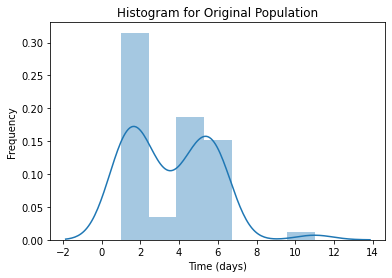

In [45]:
# Plot
sns.distplot(data)
plt.title('Histogram for Original Population')
plt.xlabel('Time (days)')
plt.ylabel('Frequency')
plt.show()

Table:

Sample 1	Sample 10	Sample 2	Sample 3	Sample 4	Sample 5	Sample 6	Sample 7	Sample 8	Sample 9	Sample means from other groups:	
6.0		2.0		4.0		3.0		2.0		6.0		5.0		6.0		6.0		1.0		1.0		
6.0		2.0		5.0		2.0		1.0		5.0		5.0		6.0		4.0		5.0		5.0		
2.0		1.0		1.0		11.0		2.0		5.0		5.0		6.0		2.0		2.0		2.0		
5.0		3.0		6.0		2.0		1.0		2.0		1.0		1.0		1.0		6.0		4.0		
4.0		2.0		1.0		6.0		6.0		1.0		3.0		5.0		1.0		2.0		6.0		
																				1.0		
																				6.0		
																				2.0		
																				4.0		
																				5.0		
mean = 4.6	mean = 2.0	mean = 3.4	mean = 4.8	mean = 2.4	mean = 3.8	mean = 3.8	mean = 4.8	mean = 2.8	mean = 3.2	mean = 3.6	
S = 1.6733	S = 0.7071	S = 2.3022	S = 3.8341	S = 2.0736	S = 2.1679	S = 1.7889	S = 2.1679	S = 2.1679	S = 2.1679	S = 1.9551	

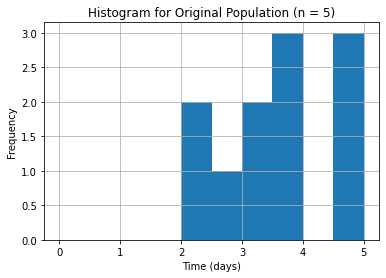

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


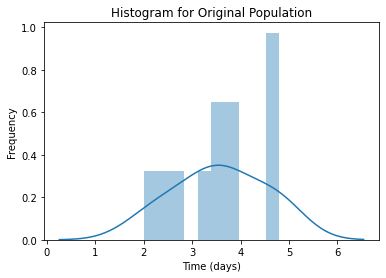

In [50]:
# Repeat for n = 5
samples_5 = generate_n_samples(10, 5, data)
print_table(samples_5)

# Plot histogram
samples_5.mean().hist(bins=10, range=(0, 5))
plt.title('Histogram for Original Population (n = 5)')
plt.xlabel('Time (days)')
plt.ylabel('Frequency')
plt.show()

# Plot
sns.distplot(samples_5.mean(), bins=10)
plt.title('Histogram for Original Population')
plt.xlabel('Time (days)')
plt.ylabel('Frequency')
plt.show()

Table:

Sample 1	Sample 2	Sample 3	Sample 4	Sample 5	Sample means from other groups:	
6		2		1		5		2		1		
6		2		2		2		5		1		
2		5		2		2		1		2		
5		2		1		6		4		2		
4		5		1		1		6		6		
2		6		1		3		4		6		
6		6		6		1		5		5		
1		4		5		5		1		11		
1		4		2		6		3		2		
1		6		5		6		5		3		
mean = 3.4	mean = 4.2	mean = 2.6	mean = 3.7	mean = 3.6	mean = 3.9	
S = 2.2211	S = 1.6865	S = 1.9551	S = 2.1108	S = 1.7764	S = 3.1429	

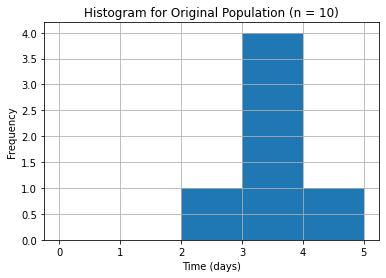

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


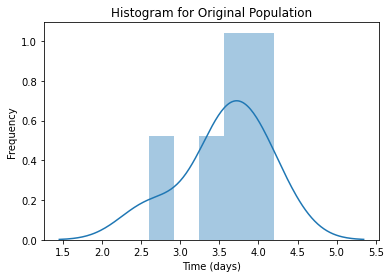

In [51]:
# Repeat for n = 10
samples_10 = generate_n_samples(5, 10, data)
print_table(samples_10)

# Plot histogram
samples_10.mean().hist(bins=5, range=(0, 5))
plt.title('Histogram for Original Population (n = 10)')
plt.xlabel('Time (days)')
plt.ylabel('Frequency')
plt.show()

# Plot
sns.distplot(samples_10.mean(), bins=5)
plt.title('Histogram for Original Population')
plt.xlabel('Time (days)')
plt.ylabel('Frequency')
plt.show()